[View in Colaboratory](https://colab.research.google.com/github/ramyaragupathy/mlblr-eip/blob/master/session-4/RAMYA_BATCH_1_ASSIGNMENT4A_.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


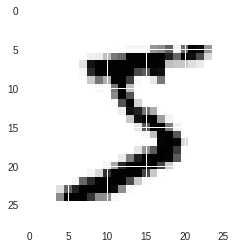

In [261]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [264]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [266]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [339]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 24))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [340]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_60 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_52 (Activation)   (None, 10)                0         
Total params: 58,772
Trainable params: 58,772
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [342]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.1652 - acc: 0.9521
Epoch 2/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0620 - acc: 0.9812
Epoch 3/10
 2272/60000 [>.............................] - ETA: 17s - loss: 0.0332 - acc: 0.9872

60000/60000 [==============================] - 18s 303us/step - loss: 0.0467 - acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0363 - acc: 0.9883
Epoch 5/10
 7744/60000 [==>...........................] - ETA: 15s - loss: 0.0232 - acc: 0.9928

60000/60000 [==============================] - 18s 301us/step - loss: 0.0287 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0235 - acc: 0.9921
Epoch 7/10
 9440/60000 [===>..........................] - ETA: 15s - loss: 0.0128 - acc: 0.9954

60000/60000 [==============================] - 18s 303us/step - loss: 0.0188 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0145 - acc: 0.9953
Epoch 9/10
10240/60000 [====>.........................] - ETA: 14s - loss: 0.0092 - acc: 0.9972

60000/60000 [==============================] - 18s 299us/step - loss: 0.0134 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0113 - acc: 0.9961


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [344]:
print(score)

[0.06124489648925983, 0.9851]


In [0]:
y_pred = model.predict(X_test)

In [348]:
print(y_pred[:9])
print(y_test[:9])

[[2.8181728e-19 3.1327789e-18 2.0246284e-13 2.4002191e-09 3.0054835e-20
  4.0495946e-15 2.7127502e-30 1.0000000e+00 5.2147627e-14 4.4700408e-09]
 [1.8381098e-07 7.0609869e-09 9.9999964e-01 1.4371951e-15 3.1997886e-24
  1.5883673e-16 9.0069413e-08 1.9777392e-20 4.0390161e-12 6.0779151e-20]
 [1.7384722e-12 9.9999225e-01 3.4904613e-08 3.4631416e-11 2.2868312e-08
  1.7303160e-10 3.4556964e-12 4.1557517e-08 7.5802245e-06 1.0129293e-10]
 [9.9999845e-01 9.9127712e-18 4.2422941e-09 1.0168793e-13 3.4197943e-11
  8.3980633e-14 1.4954082e-06 2.7592278e-10 2.0514852e-10 9.6143395e-09]
 [5.9391592e-13 2.6667781e-19 1.3180208e-14 2.8625724e-13 1.0000000e+00
  1.3048056e-19 2.1555388e-13 1.5346413e-12 2.3101796e-09 4.4753495e-08]
 [1.5370485e-14 9.9999666e-01 1.8651682e-10 8.9109444e-13 6.4559198e-09
  3.4410232e-13 9.6640202e-16 1.8386997e-06 1.4926500e-06 8.8547038e-11]
 [2.3891623e-19 1.0102294e-15 2.0527476e-11 8.7139732e-16 9.9997318e-01
  7.6072360e-12 2.2708517e-17 1.2606975e-10 2.6835558e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

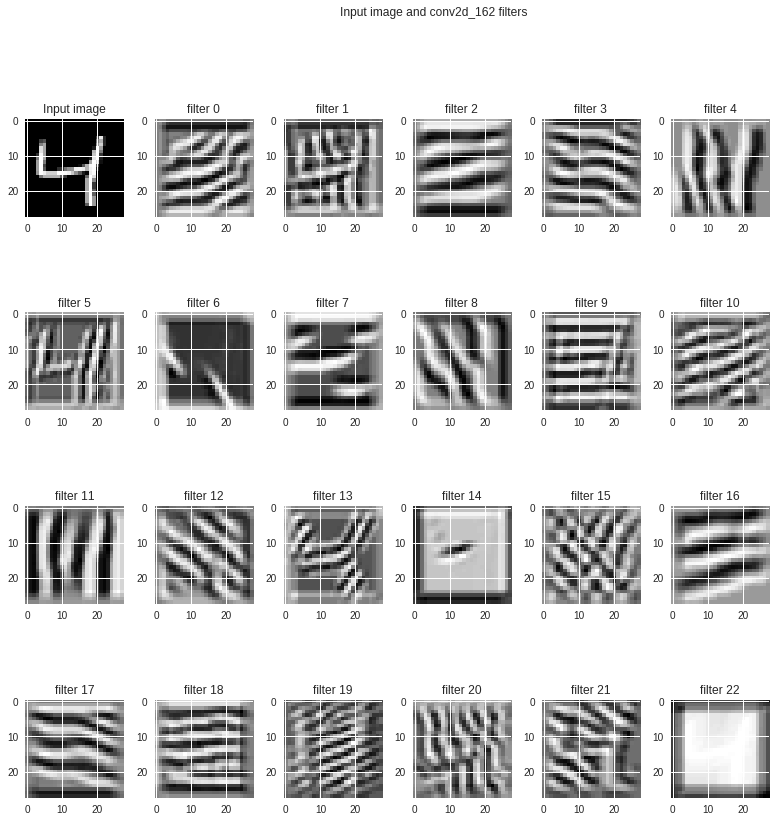

In [350]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_162'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()